In [1]:
import tensorflow as tf, cv2, numpy as np, matplotlib.pyplot as plt, plotly.express as px
import os

In [2]:
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [3]:
def image_getter(base_dir, skip_function):
    for part in os.listdir(base_dir):
        if skip_function(part):
            continue
        for img_class in os.listdir(os.path.join(base_dir,part)):
            for i in os.listdir(os.path.join(base_dir,part,img_class)):
                image = cv2.imread(os.path.join(base_dir,part,img_class,i),cv2.IMREAD_GRAYSCALE)
                image = np.reshape(image,image.shape+(1,))
                label=int(img_class.split('_')[0])-1
                if label>2:
                    label -=1
                if label>5:
                    label -=1

                yield image/255, label

def train_image_getter(base_dir="./../archive/leapgestrecog/leapGestRecog/", skip_dir='09'):
    return image_getter(base_dir, lambda x: skip_dir in x)
def test_image_getter(base_dir="./../archive/leapgestrecog/leapGestRecog/", leave_dir='09'):
    return image_getter(base_dir, lambda x: leave_dir not in x)

In [4]:
test = tf.data.Dataset.from_generator(test_image_getter, output_types=(tf.float32,tf.int8))
test_ds = test.shuffle(2000, reshuffle_each_iteration=True).repeat(1).batch(16)

In [5]:
model = tf.keras.models.load_model('02_iteration_clahe.h5')

In [6]:
model.evaluate(test_ds.as_numpy_iterator())

100/100 [==============================] - 7s 73ms/step - loss: 1.7614 - sparse_categorical_accuracy: 0.9125


[1.761388897895813, 0.9125000238418579]

In [7]:
a=test_ds.as_numpy_iterator().__next__()

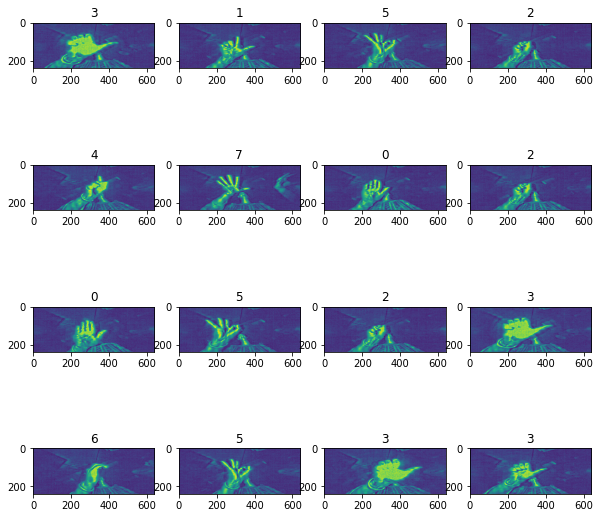

In [15]:
fig,axs = plt.subplots(4,4)
fig.set_size_inches(10,10)
for i in range(16):
    axs.flatten()[i].imshow(a[0][i])
    axs.flatten()[i].set_title(a[1][i])